In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [27]:
filename ='original_dataset/pd_speech_features.csv'
dataframe = pd.read_csv(filename)

In [3]:
dataframe.shape

(757, 755)

In [4]:
dataframe.head()

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1


In [5]:
new_header = dataframe.iloc[0] #grab the first row for the header
dataframe = dataframe[1:] #take the data less the header row
dataframe.columns = new_header #set the header row as the df header

In [6]:
new_header

Unnamed: 0                                  id
Unnamed: 1                              gender
Baseline Features                          PPE
Unnamed: 3                                 DFA
Unnamed: 4                                RPDE
                               ...            
Unnamed: 750         tqwt_kurtosisValue_dec_33
Unnamed: 751         tqwt_kurtosisValue_dec_34
Unnamed: 752         tqwt_kurtosisValue_dec_35
Unnamed: 753         tqwt_kurtosisValue_dec_36
Unnamed: 754                             class
Name: 0, Length: 755, dtype: object

In [7]:
dataframe

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,250,0,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,...,3.0706,3.019,3.1212,2.4921,3.5844,3.54,3.3805,3.2003,6.8671,0
753,250,0,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.417,0
754,251,0,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
755,251,0,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [8]:
dataframe.columns.shape

(755,)

In [9]:
dataframe.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


# Data Extraction from the dataset
Baseline Features: Column-3 to Column-23 Intensity Parameters: Col24 to Col26 Formant Frequencies: Col27 to Col30 Bandwidth Parameters: Col31 to Col34 Vocal Fold: Col35 to Col56 MFCC: Col57 to Col140 Wavelet Features: Col141 to Col322 TQWT Features: Col323 to Col754 Class: Col755

Refer Research Page: 6 - 9

In [10]:
baseline = dataframe.iloc[:,2:23]
intensity = dataframe.iloc[:,23:26]
frequency = dataframe.iloc[:,26:30]
bandwidth = dataframe.iloc[:,30:34]
vocal = dataframe.iloc[:,34:56]
mfcc = dataframe.iloc[:,56:140]
wavelet = dataframe.iloc[:,140:322]
tqwt = dataframe.iloc[:,322:755]
y = dataframe['class']

In [11]:
baseline

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity
1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,1.76E-05,0.00067,...,0.002,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995
2,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,1.61E-05,0.00052,...,0.00157,0.05516,0.502,0.0232,0.03675,0.06195,0.06961,0.984322,0.017974,21.497
3,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,1.47E-05,0.00057,...,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651
4,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,4.55E-05,0.00149,...,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865
5,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,4.37E-05,0.00166,...,0.00499,0.0561,0.497,0.02909,0.03327,0.05278,0.08728,0.975754,0.027139,19.557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,2.97E-06,8.00E-05,...,0.00024,0.01947,0.171,0.01068,0.0126,0.01547,0.03204,0.997438,0.002571,26.813
753,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,6.50E-06,0.00016,...,0.00047,0.04291,0.482,0.02307,0.02626,0.03272,0.0692,0.976867,0.025519,17.802
754,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,3.87E-06,0.00011,...,0.00034,0.02978,0.263,0.01597,0.01916,0.02271,0.0479,0.995544,0.00448,24.005
755,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,5.24E-06,0.00017,...,0.00052,0.03552,0.311,0.01791,0.02348,0.02648,0.05373,0.988241,0.011931,19.706


# Baseline Columns


In [12]:
mean_value_columns = [cols for cols in baseline.columns if cols.__contains__('mean')]
std_value_columns = [cols for cols in baseline.columns if cols.__contains__('std')]
other_columns = list(set(baseline.columns) - set(mean_value_columns) - set(std_value_columns))

In [13]:
extracted_df = baseline[other_columns].join([intensity,frequency,bandwidth,y])
extracted_df.shape

(756, 28)

# Exploratory_data_analysis

In [14]:
extracted_df.columns #checking columns

Index(['apq11Shimmer', 'DFA', 'RPDE', 'apq5Shimmer', 'rapJitter', 'ddaShimmer',
       'ppq5Jitter', 'ddpJitter', 'locPctJitter', 'locShimmer', 'locDbShimmer',
       'numPeriodsPulses', 'locAbsJitter', 'apq3Shimmer', 'PPE', 'numPulses',
       'minIntensity', 'maxIntensity', 'meanIntensity', 'f1', 'f2', 'f3', 'f4',
       'b1', 'b2', 'b3', 'b4', 'class'],
      dtype='object')

In [15]:
extracted_df= extracted_df.astype(float) #converting data types from object to float
extracted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 1 to 756
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   apq11Shimmer      756 non-null    float64
 1   DFA               756 non-null    float64
 2   RPDE              756 non-null    float64
 3   apq5Shimmer       756 non-null    float64
 4   rapJitter         756 non-null    float64
 5   ddaShimmer        756 non-null    float64
 6   ppq5Jitter        756 non-null    float64
 7   ddpJitter         756 non-null    float64
 8   locPctJitter      756 non-null    float64
 9   locShimmer        756 non-null    float64
 10  locDbShimmer      756 non-null    float64
 11  numPeriodsPulses  756 non-null    float64
 12  locAbsJitter      756 non-null    float64
 13  apq3Shimmer       756 non-null    float64
 14  PPE               756 non-null    float64
 15  numPulses         756 non-null    float64
 16  minIntensity      756 non-null    float64
 1

In [16]:
#checking for missing values
extracted_df.isnull().sum()

apq11Shimmer        0
DFA                 0
RPDE                0
apq5Shimmer         0
rapJitter           0
ddaShimmer          0
ppq5Jitter          0
ddpJitter           0
locPctJitter        0
locShimmer          0
locDbShimmer        0
numPeriodsPulses    0
locAbsJitter        0
apq3Shimmer         0
PPE                 0
numPulses           0
minIntensity        0
maxIntensity        0
meanIntensity       0
f1                  0
f2                  0
f3                  0
f4                  0
b1                  0
b2                  0
b3                  0
b4                  0
class               0
dtype: int64

In [17]:
extracted_df.describe()

,apq11Shimmer,DFA,RPDE,apq5Shimmer,rapJitter,ddaShimmer,ppq5Jitter,ddpJitter,locPctJitter,locShimmer,...,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.055366,0.700414,0.489058,0.041175,0.000605,0.103125,0.001159,0.001815,0.002324,0.067473,...,73.997008,647.174519,1233.852088,2562.425251,3547.259244,213.363237,297.174077,536.821070,506.604856,0.746032
std,0.033939,0.069718,0.137442,0.027165,0.000981,0.067097,0.001677,0.002942,0.002628,0.042969,...,7.018006,134.957916,169.090402,393.315598,347.864299,306.976045,450.125488,754.341717,658.326606,0.435568
min,0.000370,0.543500,0.154300,0.004150,0.000020,0.010040,0.000050,0.000050,0.000210,0.006560,...,39.984109,237.149533,761.357661,1411.231297,2471.996546,13.525000,16.428803,21.164397,22.842528,0.000000
25%,0.030963,0.647053,0.386537,0.021935,0.000150,0.053538,0.000370,0.000450,0.000970,0.036097,...,70.920615,562.879119,1117.316190,2380.426103,3288.644496,90.939702,102.856320,152.783110,170.741827,0.000000
50%,0.047545,0.700525,0.484355,0.033705,0.000280,0.083945,0.000650,0.000840,0.001495,0.055730,...,76.855313,641.181498,1215.344125,2612.204198,3544.012403,141.610973,159.991186,265.964575,307.971279,1.000000
75%,0.071385,0.754985,0.586515,0.053023,0.000650,0.134000,0.001253,0.001952,0.002520,0.085547,...,78.718785,737.222678,1339.826741,2831.959198,3807.332055,234.098376,299.912765,518.822036,557.628796,1.000000
max,0.277500,0.852640,0.871230,0.199510,0.011050,0.391540,0.018320,0.033150,0.027750,0.251010,...,85.096353,1015.524047,1922.747225,3475.648017,4482.258531,4744.875736,4262.170070,6116.039922,5804.342078,1.000000


# Univariate Analysis

# Count Plot

/home/sushmita/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


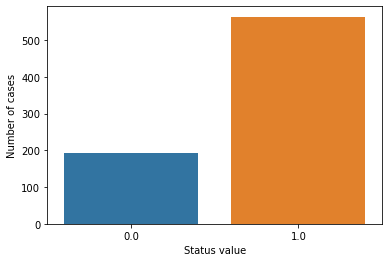

In [18]:
sns.countplot(extracted_df['class'].values)
plt.xlabel("Status value")
plt.ylabel("Number of cases")
plt.show()

In [19]:
len(extracted_df.columns)

28

# Data visualization

# Distribution Plot

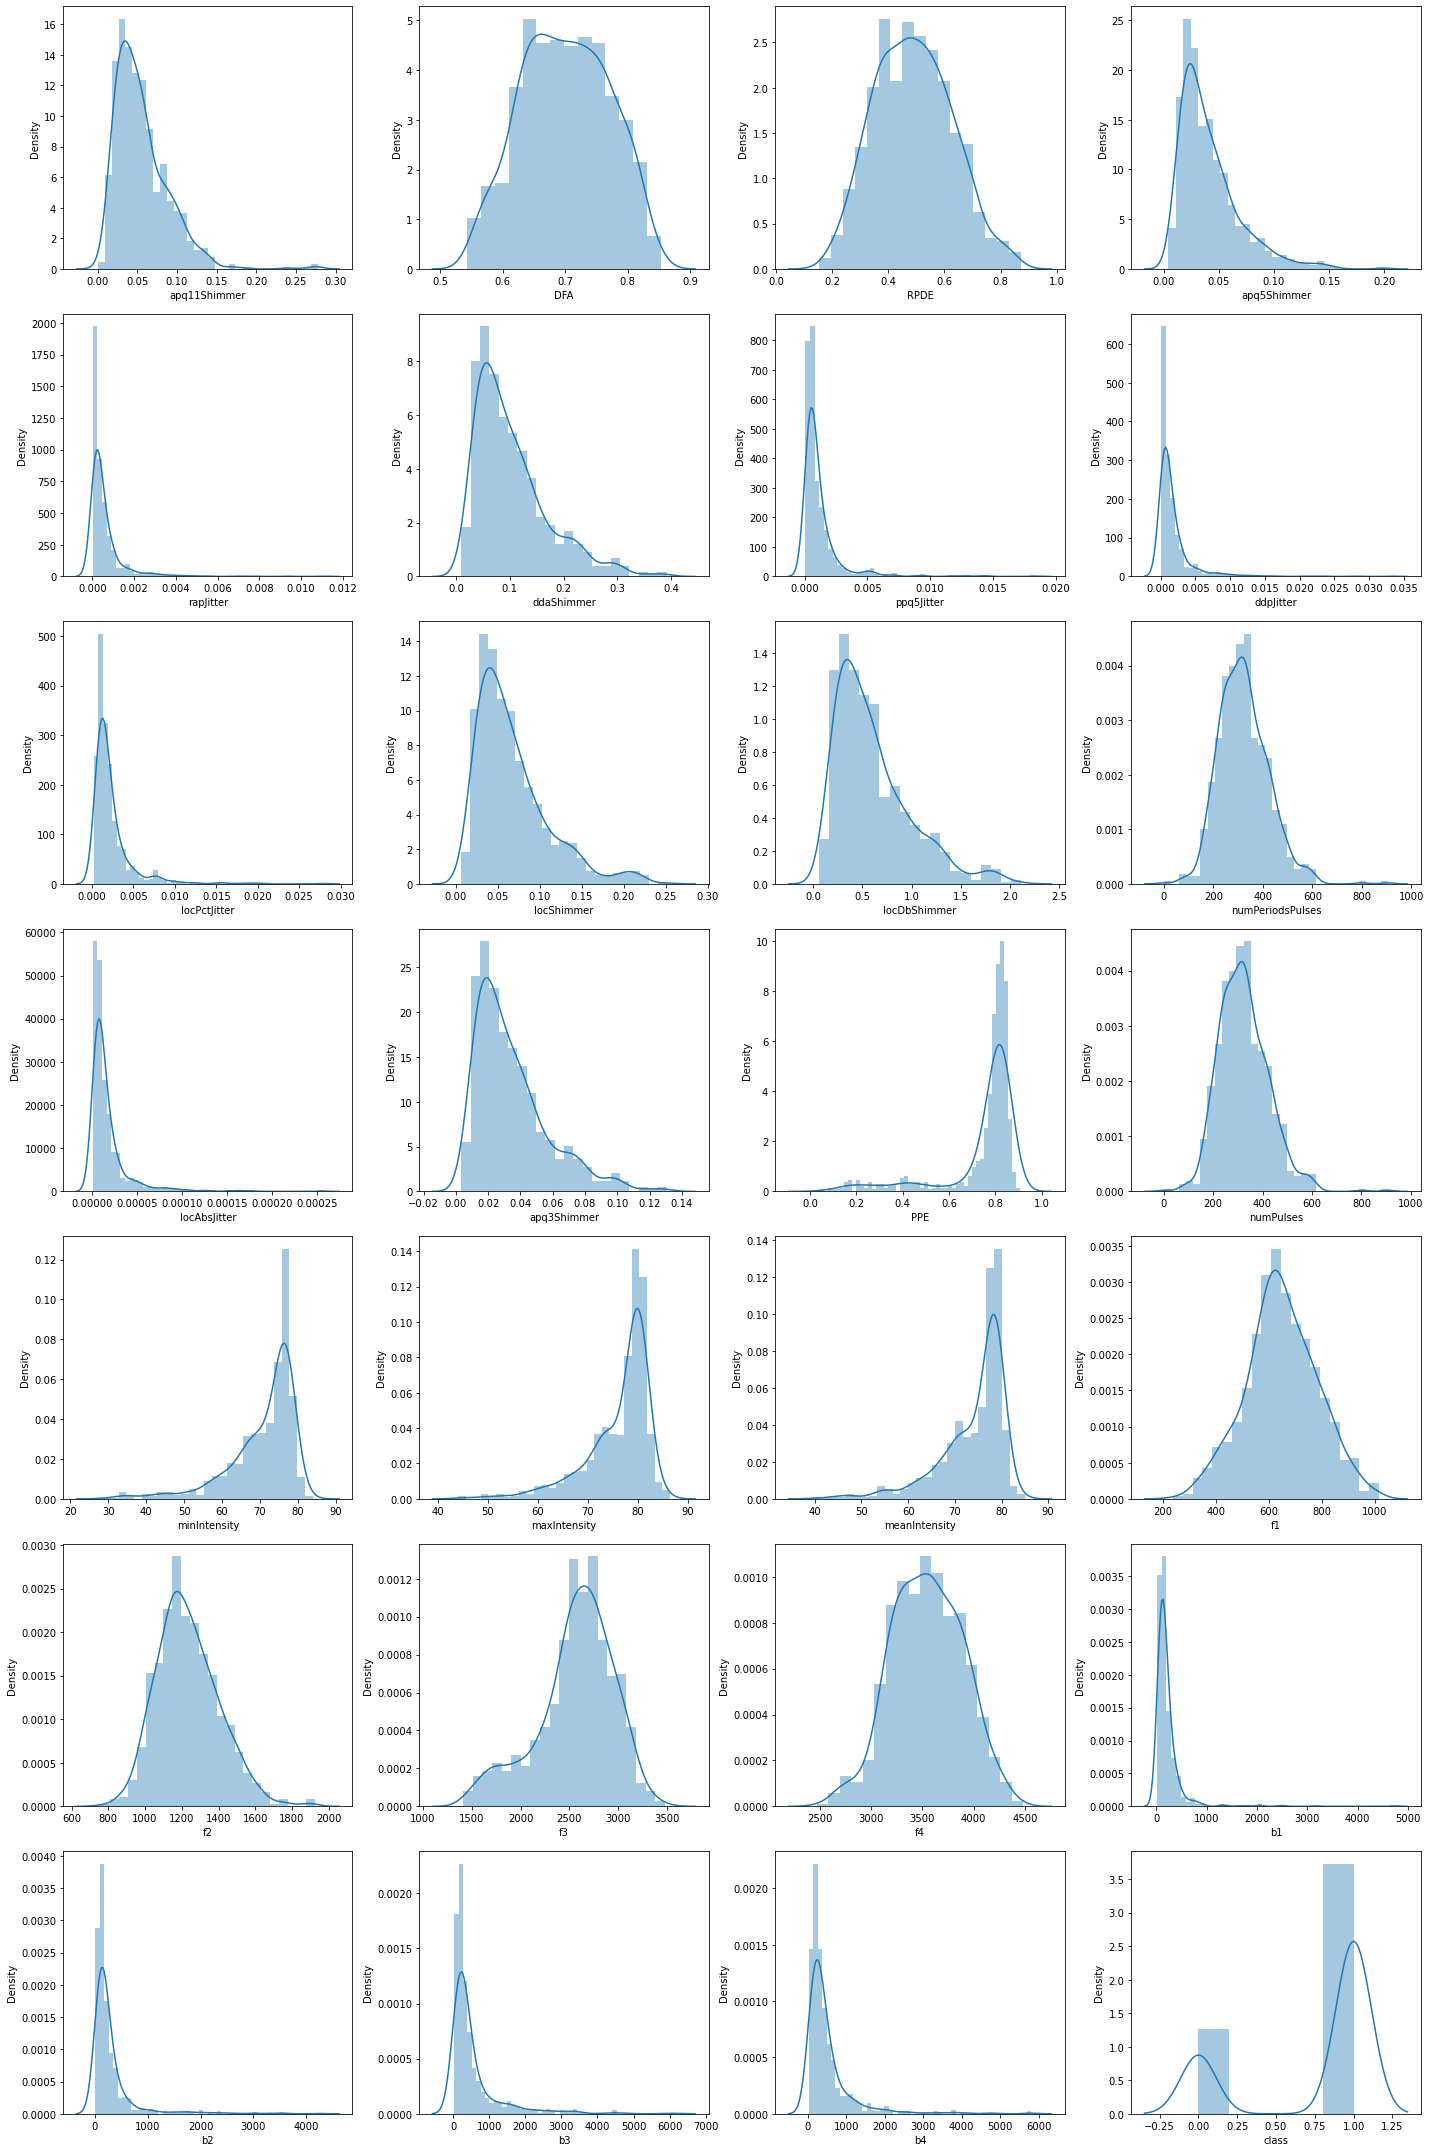

In [20]:
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize = (20, 30))
plotnumber = 1
for col in extracted_df.columns:
    if plotnumber <= len(extracted_df.columns):
        ax = plt.subplot(7, 4, plotnumber)
        sns.distplot(extracted_df[col])
        plt.xlabel(col)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# KDE Plot


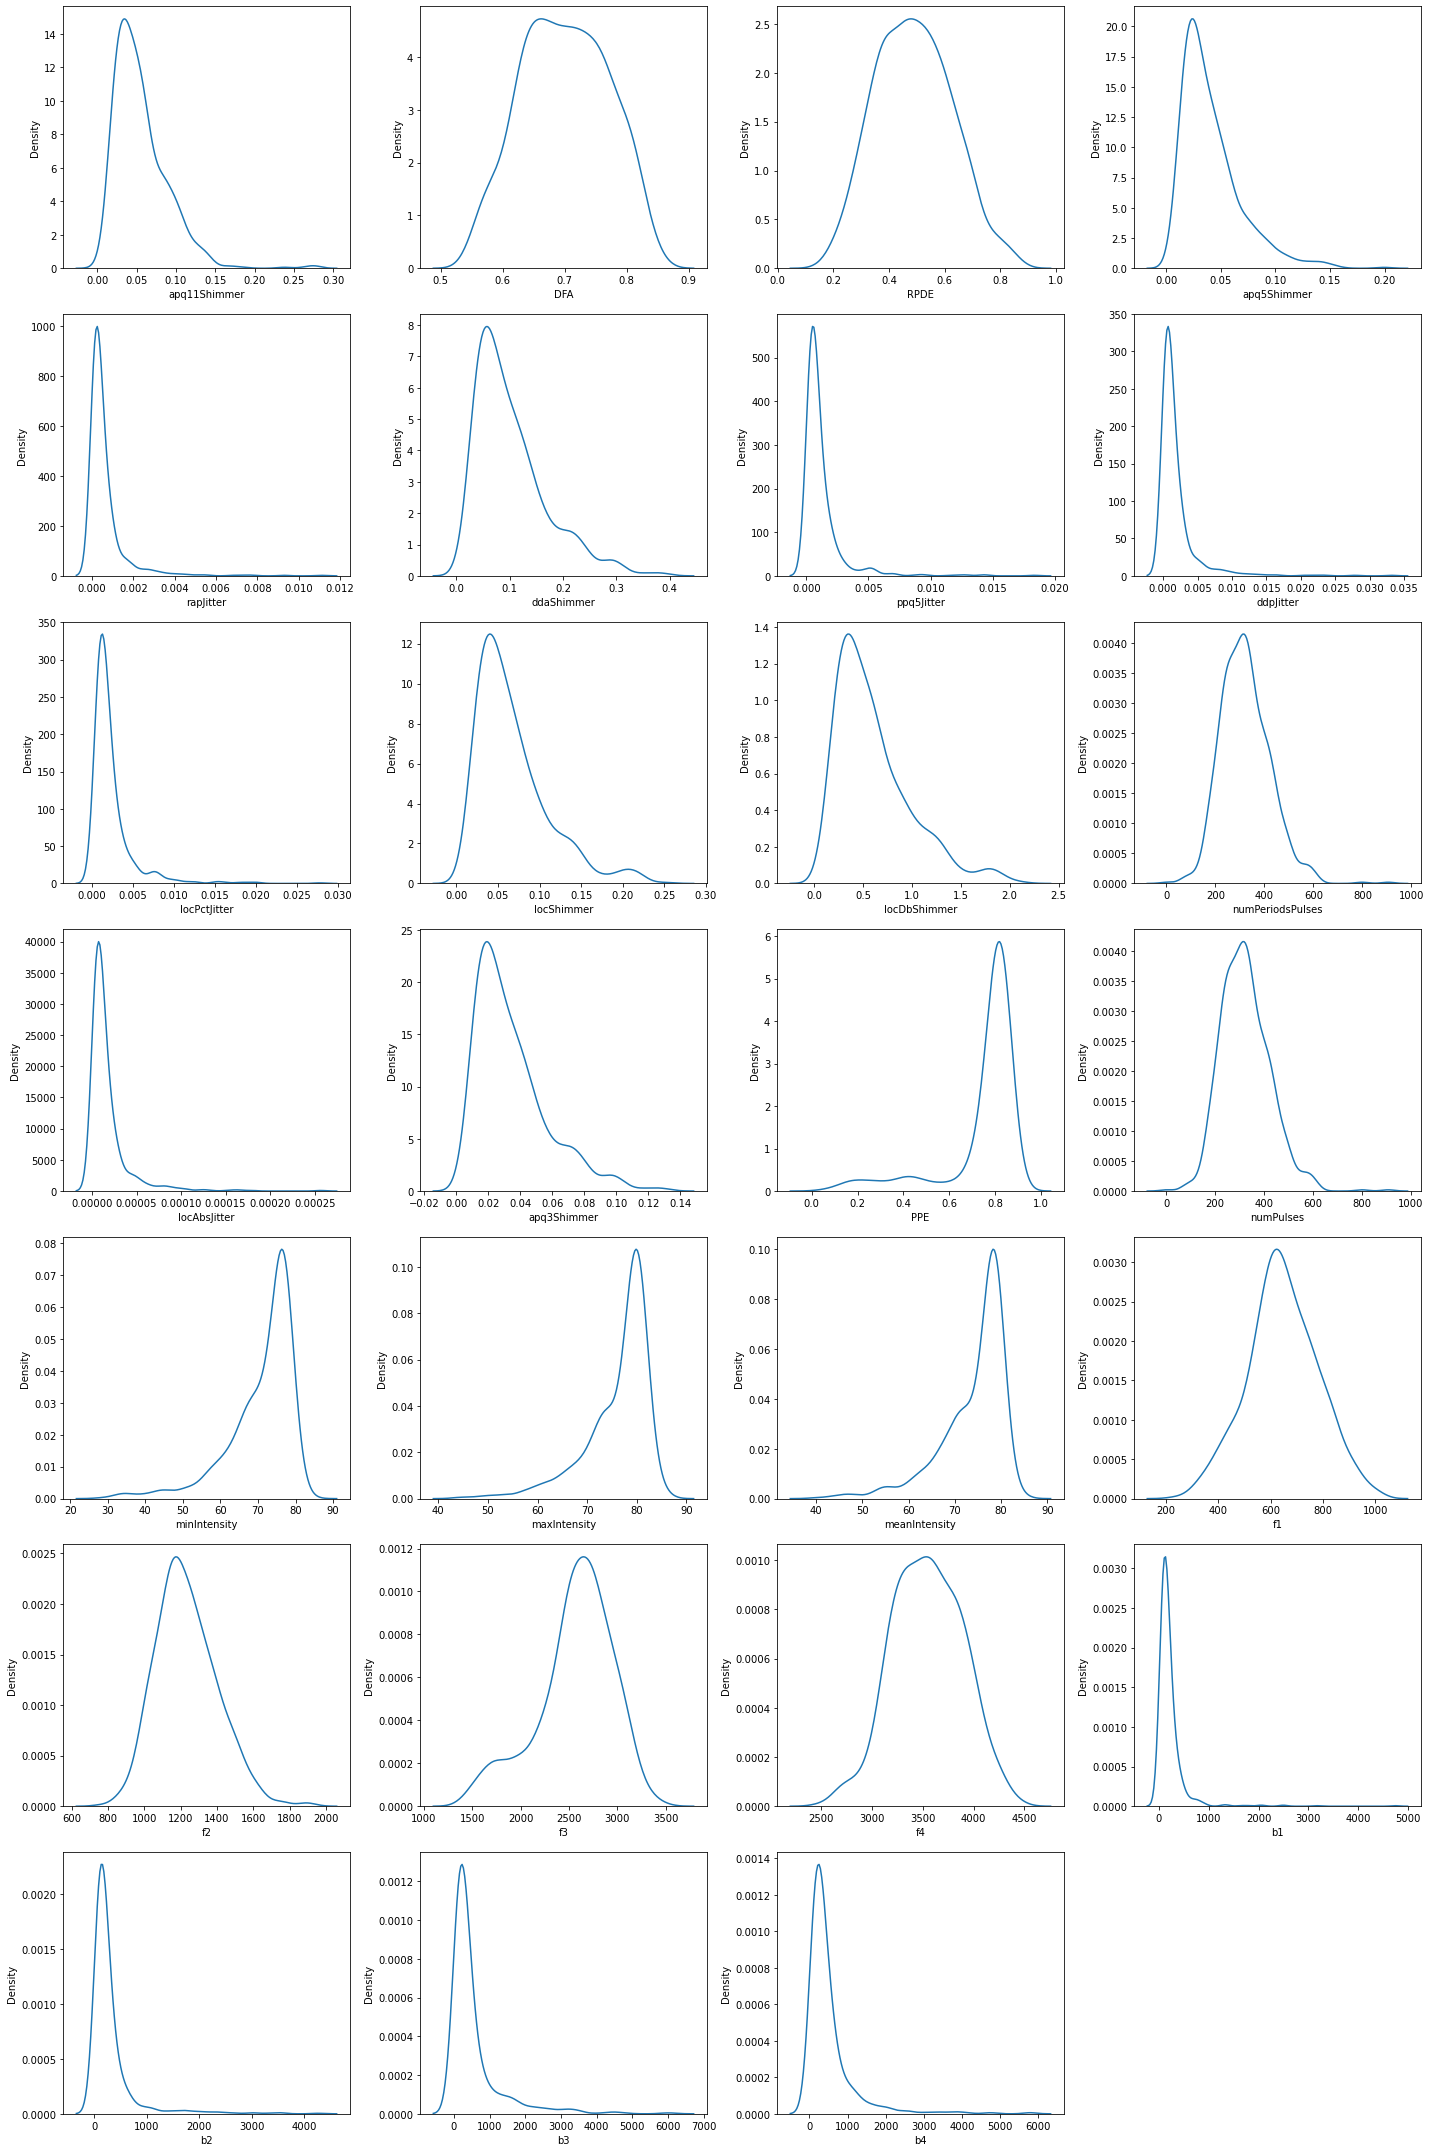

In [21]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in extracted_df.columns:
    if plotnumber <= (len(extracted_df.columns)-1):
        ax = plt.subplot(7, 4, plotnumber)
        sns.kdeplot(extracted_df[col]) 
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# Outliers Detection using Box Plot

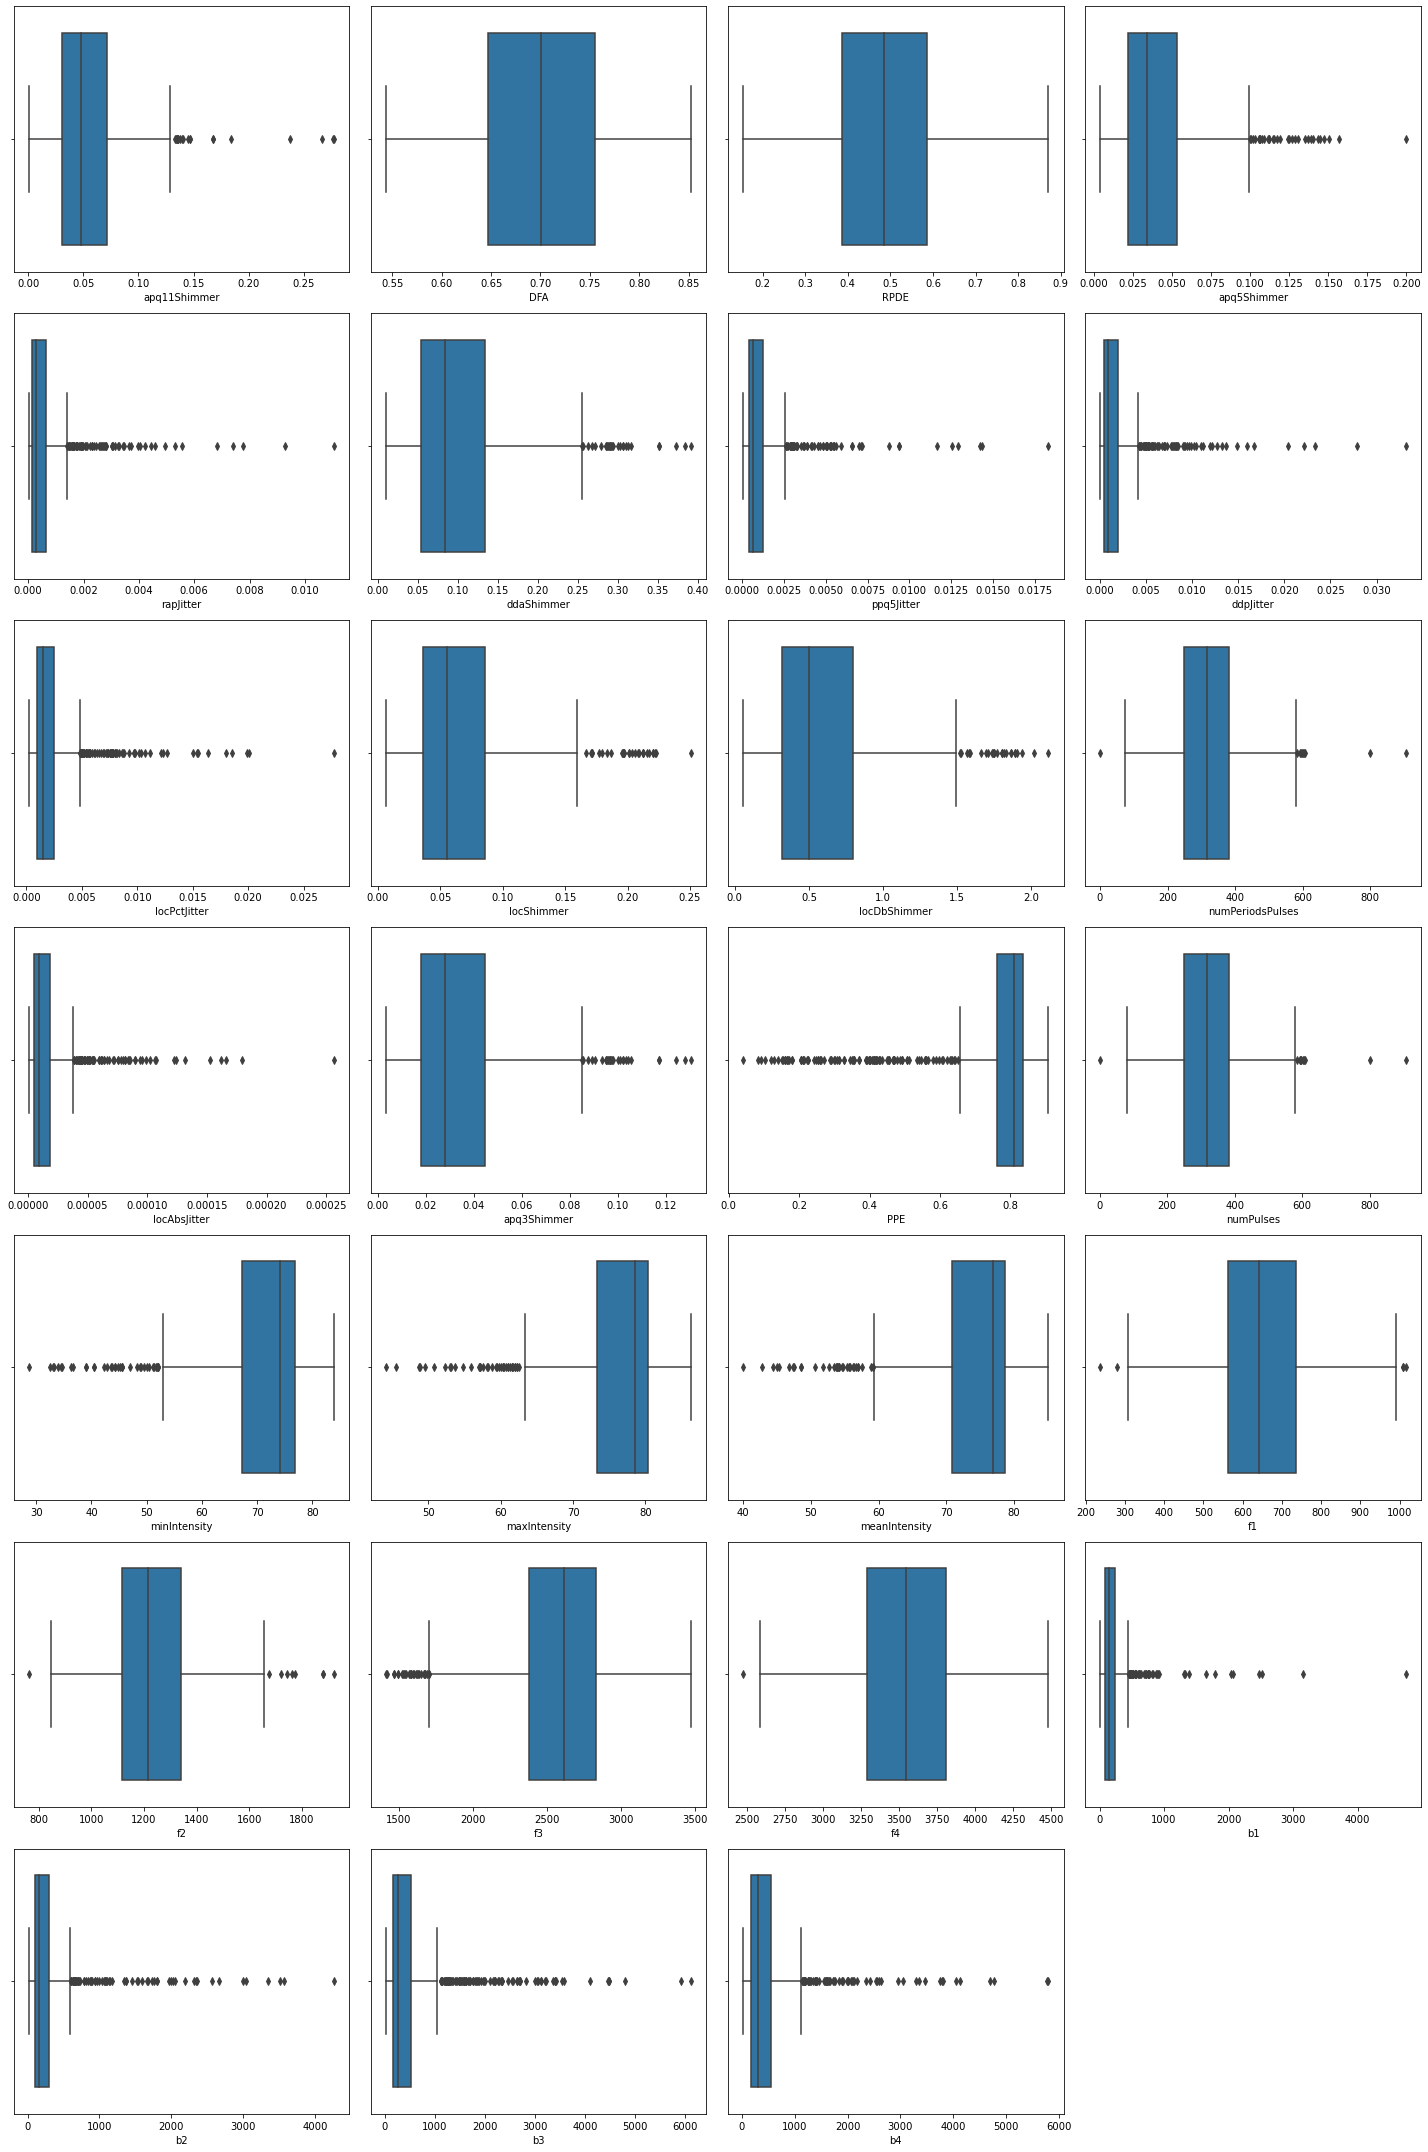

In [22]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in extracted_df.columns:
    if plotnumber <= (len(extracted_df.columns)-1):
        ax = plt.subplot(7, 4, plotnumber)
        sns.boxplot(x=col, data=extracted_df) 
        plt.xlabel(col)

        
    plotnumber += 1

plt.tight_layout()
plt.show()

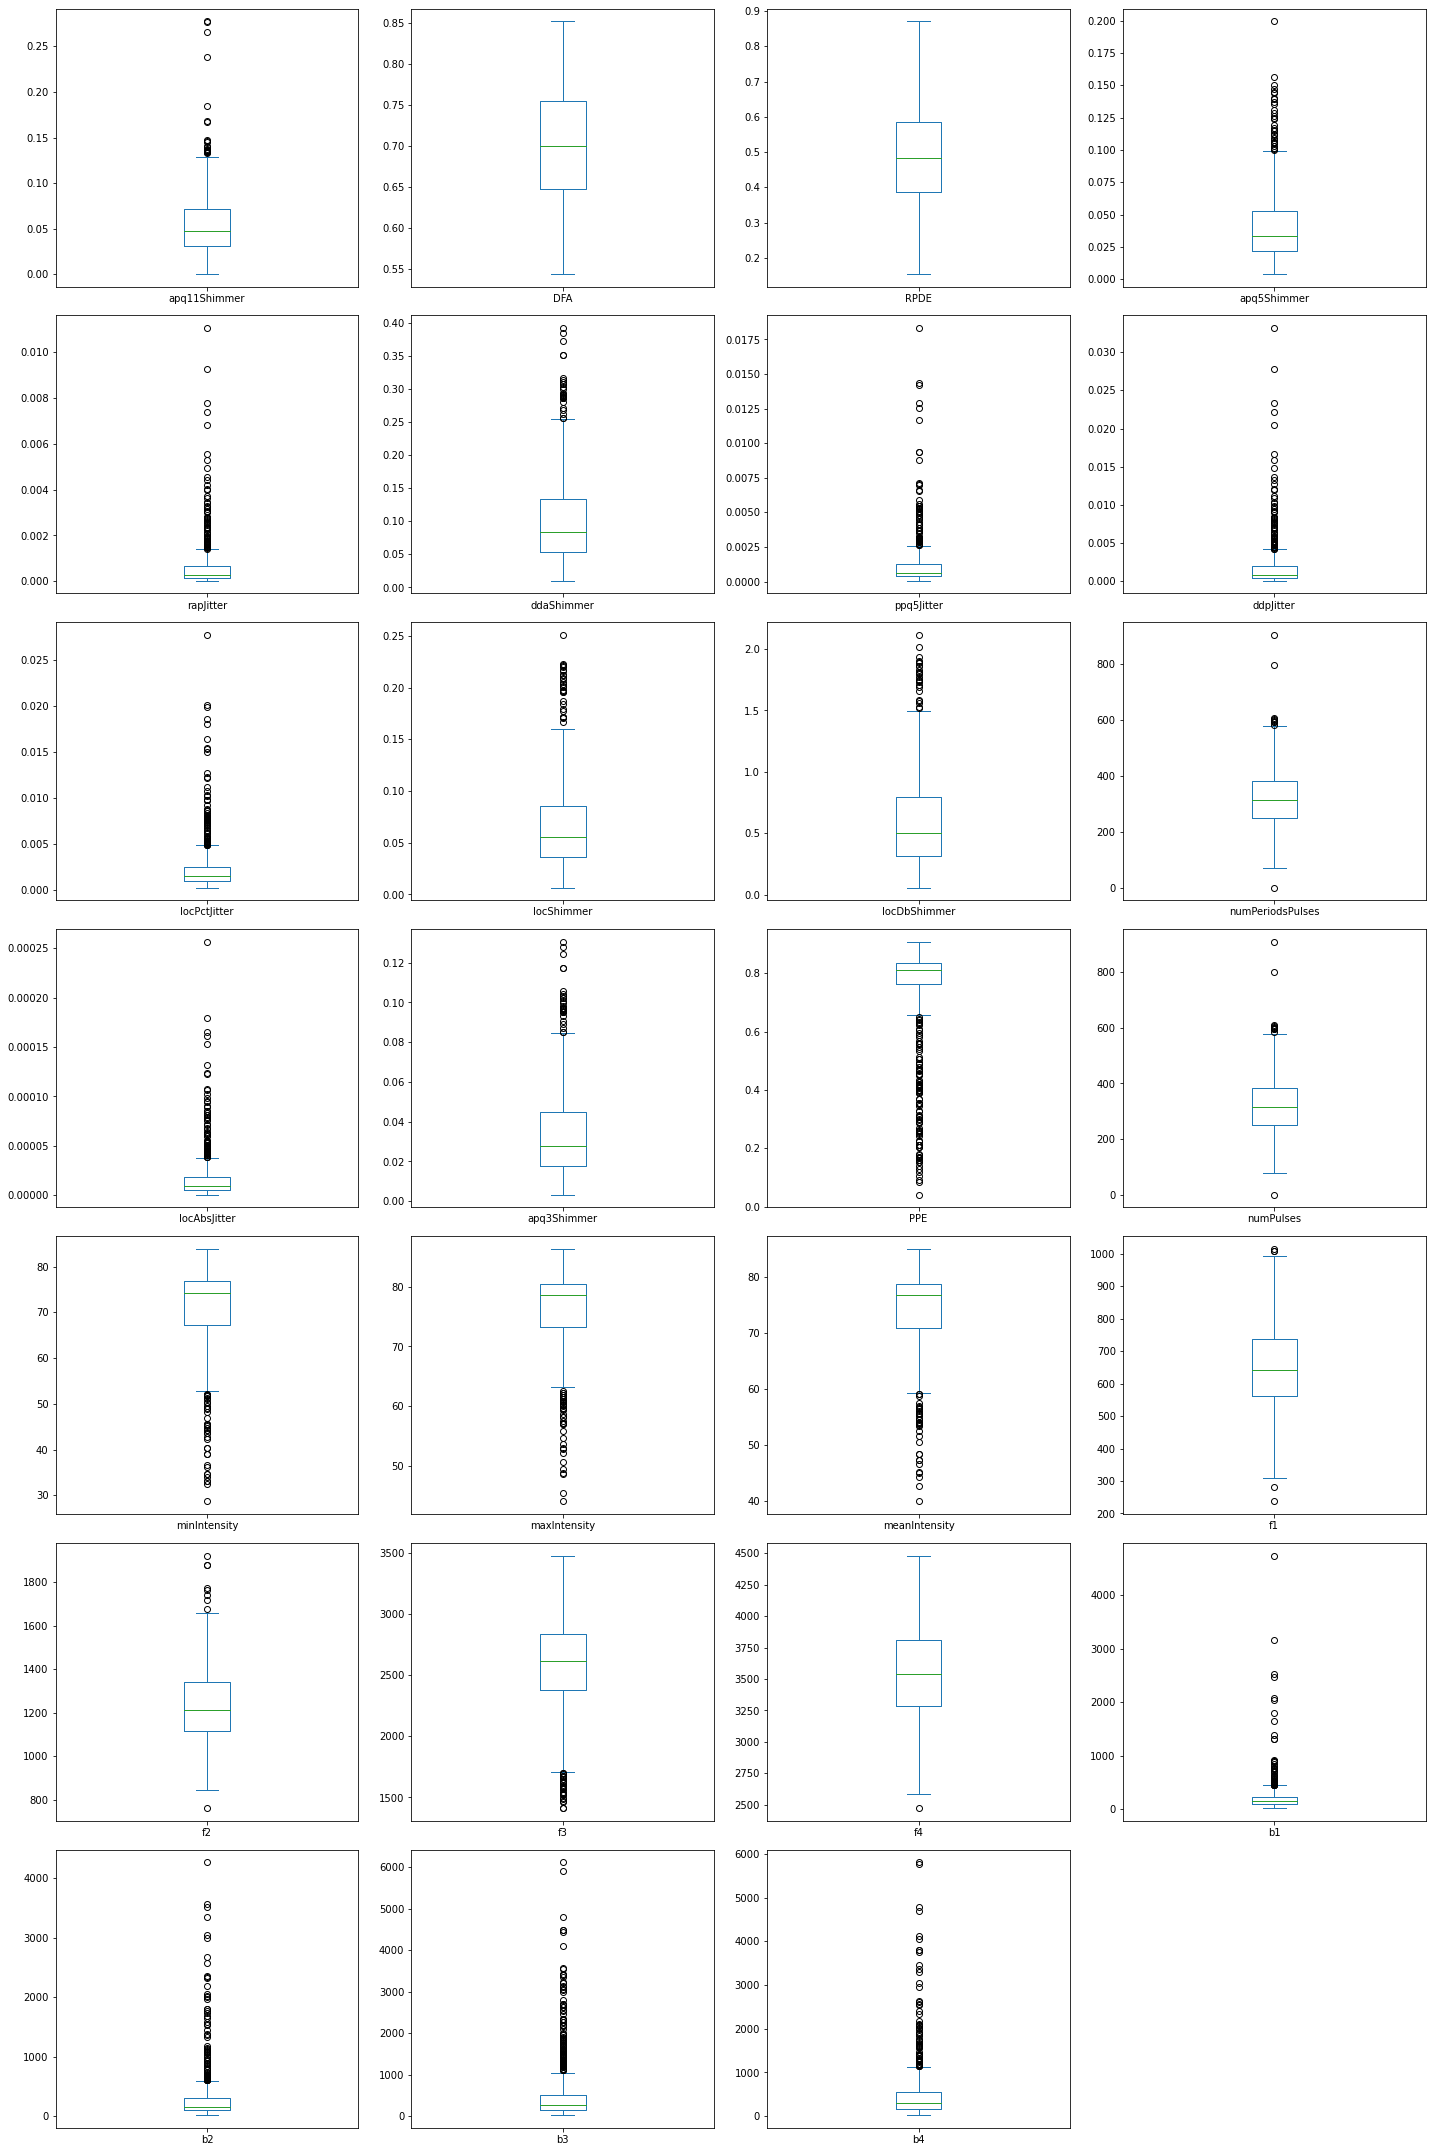

In [23]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in extracted_df.columns:
    if plotnumber <= (len(extracted_df.columns)-1):
        ax = plt.subplot(7, 4, plotnumber)
        extracted_df[col].plot(kind='box') 
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# Outliers Detection using Z-score

In [28]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
for col in extracted_df.columns:
    sample_outliers = detect_outliers_zscore(extracted_df[col])
    print("\nnumber of outliers in {}: ".format(col), len(sample_outliers))

0.055366361726190444 0.033916697099098364

number of outliers in apq11Shimmer:  7
0.7004139417989427 0.0696719188064783

number of outliers in DFA:  7
0.4890576058201053 0.1373515507236781

number of outliers in RPDE:  7
0.04117476328042326 0.027146942288488417

number of outliers in apq5Shimmer:  22
0.0006049931626984122 0.0009800630119665215

number of outliers in rapJitter:  37
0.10312532490740743 0.0670523065420974

number of outliers in ddaShimmer:  47
0.0011589665013227522 0.0016756078977672186

number of outliers in ppq5Jitter:  61
0.0018150854973544967 0.0029400982481348438

number of outliers in ddpJitter:  76
0.0023244265277777777 0.0026262626307503867

number of outliers in locPctJitter:  91
0.06747323413492066 0.04294062696699492

number of outliers in locShimmer:  110
0.6064195357804236 0.3823165222887692

number of outliers in locDbShimmer:  124
322.67857142857144 99.33673487342764

number of outliers in numPeriodsPulses:  127
1.673391137566138e-05 2.2886192448441908e-05


In [26]:
extracted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 1 to 756
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DFA               756 non-null    float64
 1   numPulses         756 non-null    float64
 2   PPE               756 non-null    float64
 3   numPeriodsPulses  756 non-null    float64
 4   locShimmer        756 non-null    float64
 5   locPctJitter      756 non-null    float64
 6   ddpJitter         756 non-null    float64
 7   locAbsJitter      756 non-null    float64
 8   apq11Shimmer      756 non-null    float64
 9   locDbShimmer      756 non-null    float64
 10  apq3Shimmer       756 non-null    float64
 11  rapJitter         756 non-null    float64
 12  apq5Shimmer       756 non-null    float64
 13  ddaShimmer        756 non-null    float64
 14  ppq5Jitter        756 non-null    float64
 15  RPDE              756 non-null    float64
 16  minIntensity      756 non-null    float64
 1

In [27]:
extracted_df.RPDE.describe()

count    756.000000
mean       0.489058
std        0.137442
min        0.154300
25%        0.386537
50%        0.484355
75%        0.586515
max        0.871230
Name: RPDE, dtype: float64

In [28]:
df = extracted_df.copy()

In [29]:
# compute IQR to calculate boundaries
IQR_apq5 = extracted_df.apq5Shimmer.quantile(0.75) - extracted_df.apq5Shimmer.quantile(0.25)
IQR_apq5

0.0310875

In [30]:
# using inter quartile range(IQR)

lower_bridge = extracted_df.apq5Shimmer.quantile(0.25) - (IQR_apq5*1.5)
upper_bridge = extracted_df.apq5Shimmer.quantile(0.75) + (IQR_apq5*1.5)
upper_bridge, lower_bridge

(0.09965375, -0.02469625)

In [31]:
#Extreme outliers using inter quartile range(IQR)

lower_bridge = extracted_df.apq5Shimmer.quantile(0.25) - (IQR_apq5*3)
upper_bridge = extracted_df.apq5Shimmer.quantile(0.75) + (IQR_apq5*3)
upper_bridge, lower_bridge

(0.146285, -0.0713275)

In [38]:
# assuming apq5Shimmer follows a normal distributiowe will calculate boundaries which will differentiates the outliers
# using standard deviation method if a value is higher or lower by three Standard Deviation from mean is considered as outlier

lower_boundary = extracted_df.apq5Shimmer.mean() - 3*extracted_df.apq5Shimmer.std()
upper_boundary = extracted_df.apq5Shimmer.mean() + 3*extracted_df.apq5Shimmer.std()
upper_boundary, lower_boundary

(0.12266950662108621, -0.040319980060239693)

Text(0.5, 0, 'apq5Shimmer')

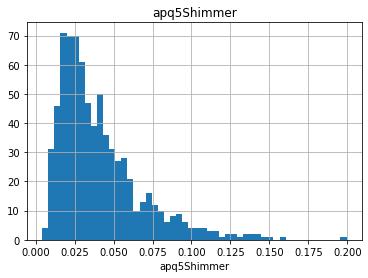

In [32]:
figure = extracted_df.apq5Shimmer.hist(bins=50)
figure.set_title('apq5Shimmer')
figure.set_xlabel('apq5Shimmer')

In [33]:
# By observing above calculated values
df.loc[df.apq5Shimmer>=0.09, 'apq5Shimmer'] = 0.09

Text(0.5, 0, 'apq5Shimmer')

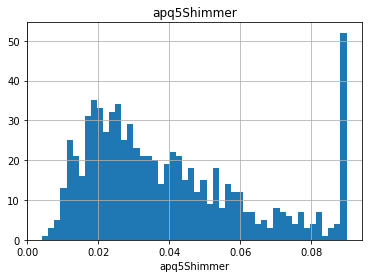

In [34]:
figure = df.apq5Shimmer.hist(bins=50)
figure.set_title('apq5Shimmer')
figure.set_xlabel('apq5Shimmer')

<AxesSubplot:>

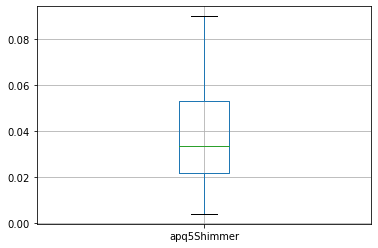

In [35]:
df.boxplot(column='apq5Shimmer')

In [36]:
# compute IQR to calculate boundaries
IQR_locdb = extracted_df.locDbShimmer.quantile(0.75) - extracted_df.locDbShimmer.quantile(0.25)
IQR_locdb

0.47775

In [37]:
lower_bridge = extracted_df.locDbShimmer.quantile(0.25) - (IQR_locdb*1.5)
upper_bridge = extracted_df.locDbShimmer.quantile(0.75) + (IQR_locdb*1.5)
upper_bridge, lower_bridge

(1.513125, -0.3978750000000001)

In [38]:
# extreme outliers
lower_bridge = extracted_df.locDbShimmer.quantile(0.25) - (IQR_locdb*3)
upper_bridge = extracted_df.locDbShimmer.quantile(0.75) + (IQR_locdb*3)
upper_bridge, lower_bridge

(2.22975, -1.1145)

Text(0.5, 0, 'RDPE')

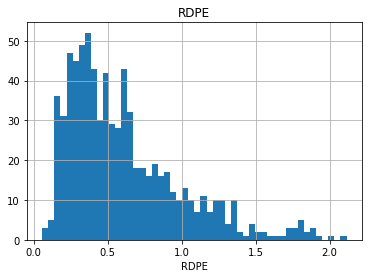

In [39]:
figure = extracted_df.locDbShimmer.hist(bins=50)
figure.set_title('RDPE')
figure.set_xlabel('RDPE')

<AxesSubplot:>

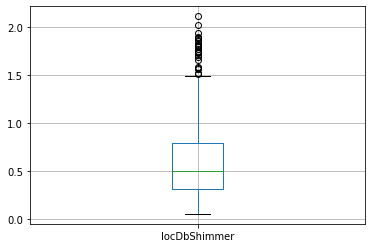

In [40]:
extracted_df.boxplot(column='locDbShimmer')

In [42]:
df.loc[df.locDbShimmer>=1.51, 'locDbShimmer'] = 1.51

Text(0.5, 0, 'locDbShimmer')

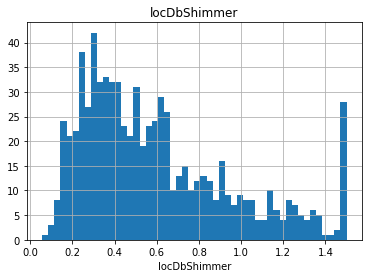

In [43]:
figure = df.locDbShimmer.hist(bins=50)
figure.set_title('locDbShimmer')
figure.set_xlabel('locDbShimmer')

<AxesSubplot:>

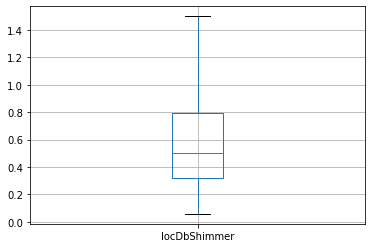

In [44]:
df.boxplot(column='locDbShimmer')

In [45]:
# compute IQR to calculate boundaries
IQR_locShim = extracted_df.locShimmer.quantile(0.75) - extracted_df.locShimmer.quantile(0.25)
IQR_locShim

0.04945

In [46]:
lower_bridge = extracted_df.locShimmer.quantile(0.25) - (IQR_locShim*1.5)
upper_bridge = extracted_df.locShimmer.quantile(0.75) + (IQR_locShim*1.5)
upper_bridge, lower_bridge

(0.1597225, -0.03807750000000001)

In [47]:
# extreme outliers
lower_bridge = extracted_df.locShimmer.quantile(0.25) - (IQR_locShim*3)
upper_bridge = extracted_df.locShimmer.quantile(0.75) + (IQR_locShim*3)
upper_bridge, lower_bridge

(0.2338975, -0.1122525)

Text(0.5, 0, 'locShimmer')

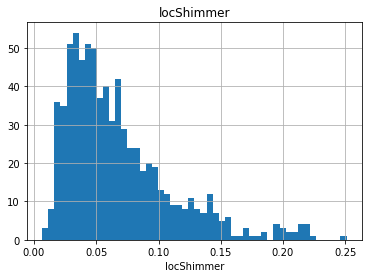

In [48]:
figure = extracted_df.locShimmer.hist(bins=50)
figure.set_title('locShimmer')
figure.set_xlabel('locShimmer')

<AxesSubplot:>

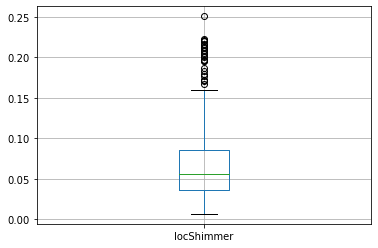

In [49]:
extracted_df.boxplot('locShimmer')

In [53]:
df.loc[df.locShimmer>=0.159, 'locShimmer'] = 0.159

Text(0.5, 0, 'locShimmer')

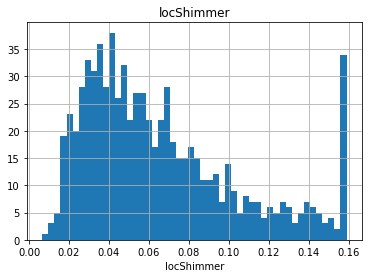

In [54]:
figure = df.locShimmer.hist(bins=50)
figure.set_title('locShimmer')
figure.set_xlabel('locShimmer')

<AxesSubplot:>

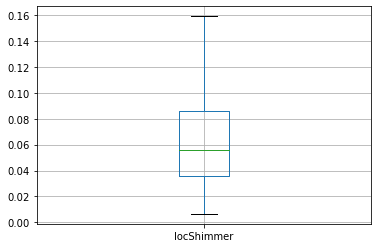

In [55]:
df.boxplot(column='locShimmer')

In [56]:
# compute IQR to calculate boundaries
IQR_apq3 = extracted_df.apq3Shimmer.quantile(0.75) - extracted_df.apq3Shimmer.quantile(0.25)
IQR_apq3

0.026822500000000003

In [57]:
lower_bridge = extracted_df.apq3Shimmer.quantile(0.25) - (IQR_apq3*1.5)
upper_bridge = extracted_df.apq3Shimmer.quantile(0.75) + (IQR_apq3*1.5)
upper_bridge, lower_bridge

(0.08489875000000001, -0.022391250000000005)

In [58]:
#Extreme outliers

lower_bridge = extracted_df.apq3Shimmer.quantile(0.25) - (IQR_apq3*3)
upper_bridge = extracted_df.apq3Shimmer.quantile(0.75) + (IQR_apq3*3)
upper_bridge, lower_bridge

(0.1251325, -0.06262500000000001)

Text(0.5, 0, 'apq3Shimmer')

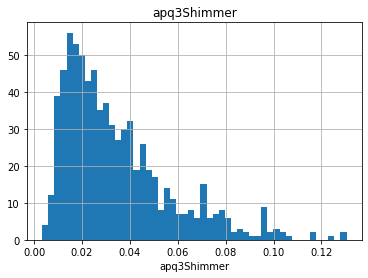

In [59]:
figure = extracted_df.apq3Shimmer.hist(bins=50)
figure.set_title('apq3Shimmer')
figure.set_xlabel('apq3Shimmer')

<AxesSubplot:>

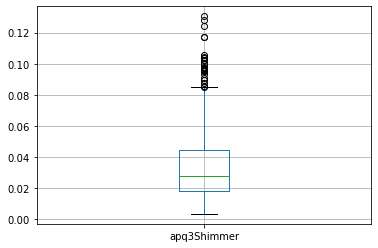

In [60]:
extracted_df.boxplot('apq3Shimmer')

In [61]:
df.loc[df.apq3Shimmer>=0.084, 'apq3Shimmer'] = 0.084

Text(0.5, 0, 'apq3Shimmer')

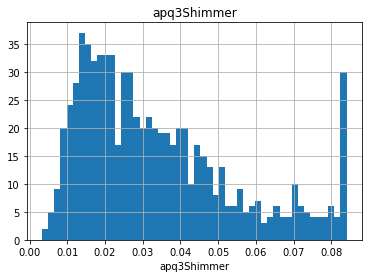

In [62]:
figure = df.apq3Shimmer.hist(bins=50)
figure.set_title('apq3Shimmer')
figure.set_xlabel('apq3Shimmer')

<AxesSubplot:>

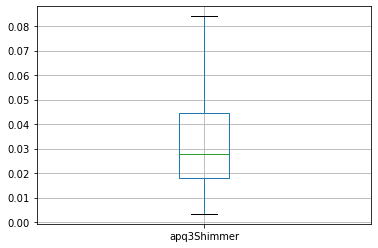

In [63]:
df.boxplot(column='apq3Shimmer')

In [64]:
# compute IQR to calculate boundaries
IQR_ddp = extracted_df.ddpJitter.quantile(0.75) - extracted_df.ddpJitter.quantile(0.25)
IQR_ddp

0.0015025

In [65]:
lower_bridge = extracted_df.ddpJitter.quantile(0.25) - (IQR_ddp*1.5)
upper_bridge = extracted_df.ddpJitter.quantile(0.75) + (IQR_ddp*1.5)
upper_bridge, lower_bridge

(0.00420625, -0.0018037499999999998)

In [66]:
# extreme outliers
lower_bridge = extracted_df.ddpJitter.quantile(0.25) - (IQR_ddp*3)
upper_bridge = extracted_df.ddpJitter.quantile(0.75) + (IQR_ddp*3)
upper_bridge, lower_bridge

(0.006459999999999999, -0.0040574999999999995)

Text(0.5, 0, 'apq3Shimmer')

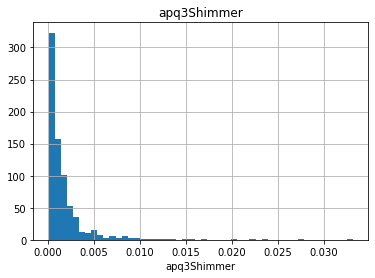

In [67]:
figure = extracted_df.ddpJitter.hist(bins=50)
figure.set_title('apq3Shimmer')
figure.set_xlabel('apq3Shimmer')

<AxesSubplot:>

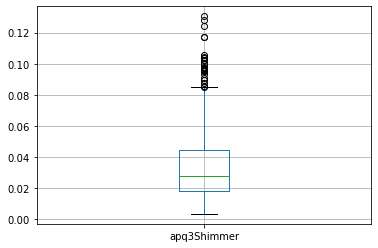

In [68]:
extracted_df.boxplot('apq3Shimmer')

In [60]:
df.loc[df.ddpJitter>=0.004, 'ddpJitter'] = 0.004

Text(0.5, 0, 'ddpJitter')

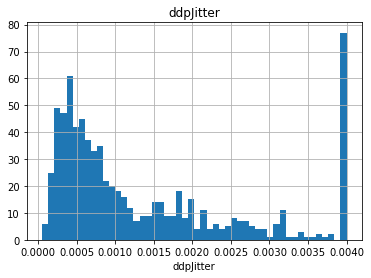

In [61]:
figure = df.ddpJitter.hist(bins=50)
figure.set_title('ddpJitter')
figure.set_xlabel('ddpJitter')

<AxesSubplot:>

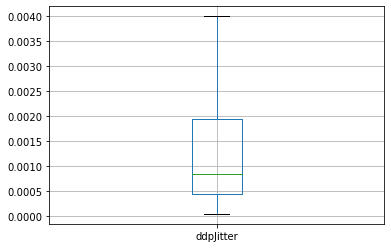

In [62]:
df.boxplot(column='ddpJitter')

In [118]:
# compute IQR to calculate boundaries
IQR_apq11 = extracted_df.apq11Shimmer.quantile(0.75) - extracted_df.apq11Shimmer.quantile(0.25)
IQR_apq11

0.0404225

In [119]:
# assuming apq11Shimmer follows a normal distributiowe will calculate boundaries which will differentiates the outliers
lower_boundary = extracted_df.apq11Shimmer.mean() + 3*extracted_df.apq11Shimmer.std()
upper_boundary = extracted_df.apq11Shimmer.mean() - 3*extracted_df.apq11Shimmer.std()
upper_boundary, lower_boundary

(-0.046451091439653175, 0.15718381489203406)

In [120]:
lower_bridge = extracted_df.apq11Shimmer.quantile(0.25) - (IQR_apq11*1.5)
upper_bridge = extracted_df.apq11Shimmer.quantile(0.75) + (IQR_apq11*1.5)
upper_bridge, lower_bridge

(0.13201875000000002, -0.02967125)

In [122]:
# extreme outliers
lower_bridge = extracted_df.apq11Shimmer.quantile(0.25) - (IQR_apq11*3)
upper_bridge = extracted_df.apq11Shimmer.quantile(0.75) + (IQR_apq11*3)
upper_bridge, lower_bridge

(0.1926525, -0.090305)

Text(0.5, 0, 'apq11Shimmer')

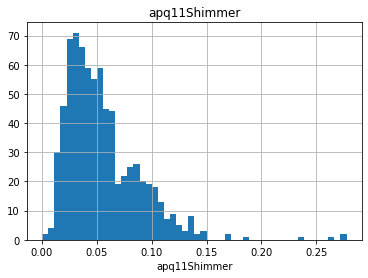

In [123]:
figure = extracted_df.apq11Shimmer.hist(bins=50)
figure.set_title('apq11Shimmer')
figure.set_xlabel('apq11Shimmer')

In [126]:
df.loc[df.apq11Shimmer>=0.19, 'apq11Shimmer'] = 0.19

Text(0.5, 0, 'apq11Shimmer')

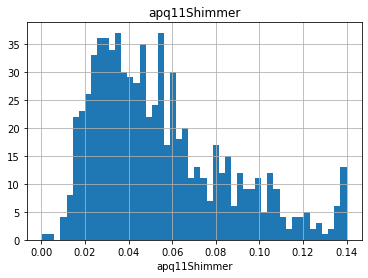

In [127]:
figure = df.apq11Shimmer.hist(bins=50)
figure.set_title('apq11Shimmer')
figure.set_xlabel('apq11Shimmer')

<AxesSubplot:>

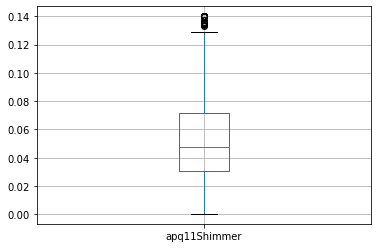

In [128]:
df.boxplot(column='apq11Shimmer')

In [70]:
# compute IQR to calculate boundaries
IQR_numper = extracted_df.numPeriodsPulses.quantile(0.75) - extracted_df.numPeriodsPulses.quantile(0.25)
IQR_numper

133.25

Text(0.5, 0, 'numPeriodsPulses')

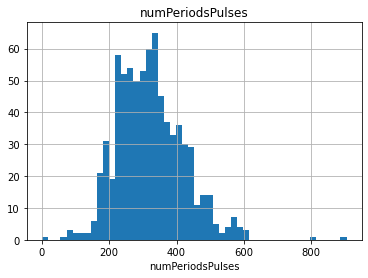

In [71]:
figure = extracted_df.numPeriodsPulses.hist(bins=50)
figure.set_title('numPeriodsPulses')
figure.set_xlabel('numPeriodsPulses')

In [73]:
upper_boundary_numper = extracted_df.numPeriodsPulses.mean() + 3*extracted_df.numPeriodsPulses.std()
lower_boundary_numper = extracted_df.numPeriodsPulses.mean() - 3*extracted_df.numPeriodsPulses.std()
upper_boundary_numper, lower_boundary_numper

(620.8860684932522, 24.471074363890693)

In [74]:
lower_bridge = extracted_df.numPeriodsPulses.quantile(0.25) - (IQR_numper*1.5)
upper_bridge = extracted_df.numPeriodsPulses.quantile(0.75) + (IQR_numper*1.5)
upper_bridge, lower_bridge

(583.125, 50.125)

In [75]:
# extreme outliers

lower_bridge = extracted_df.numPeriodsPulses.quantile(0.25) - (IQR_numper*3)
upper_bridge = extracted_df.numPeriodsPulses.quantile(0.75) + (IQR_numper*3)
upper_bridge, lower_bridge

(783.0, -149.75)

In [82]:
df.loc[df.numPeriodsPulses>=583, 'numPeriodsPulses'] = 583

Text(0.5, 0, 'numPeriodsPulses')

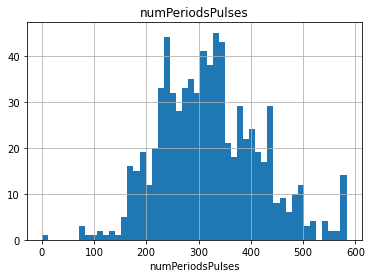

In [83]:
figure = df.numPeriodsPulses.hist(bins=50)
figure.set_title('numPeriodsPulses')
figure.set_xlabel('numPeriodsPulses')

<AxesSubplot:>

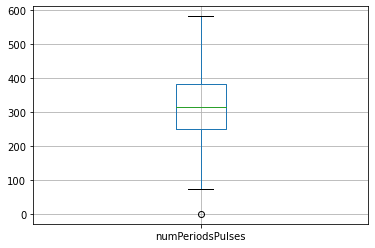

In [86]:
df.boxplot(column='numPeriodsPulses')

In [87]:
# compute IQR to calculate boundaries
IQR_abs = extracted_df.locAbsJitter.quantile(0.75) - extracted_df.locAbsJitter.quantile(0.25)
IQR_abs

1.3065000000000001e-05

In [94]:
lower_bridge = extracted_df.locAbsJitter.quantile(0.25) - (IQR_abs*1.5)
upper_bridge = extracted_df.locAbsJitter.quantile(0.75) + (IQR_abs*1.5)
upper_bridge, lower_bridge

(3.79225e-05, -1.4337500000000003e-05)

In [95]:
# extreme outliers
lower_bridge = extracted_df.locAbsJitter.quantile(0.25) - (IQR_abs*3)
upper_bridge = extracted_df.locAbsJitter.quantile(0.75) + (IQR_abs*3)
upper_bridge, lower_bridge

(5.7520000000000005e-05, -3.3935000000000006e-05)

Text(0.5, 0, 'locAbsJitter')

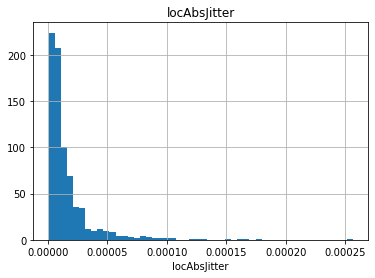

In [97]:
figure = extracted_df.locAbsJitter.hist(bins=50)
figure.set_title('locAbsJitter')
figure.set_xlabel('locAbsJitter')

In [104]:
df.loc[df.locAbsJitter>=0.000057, 'locAbsJitter'] = 0.000057

Text(0.5, 0, 'locAbsJitter')

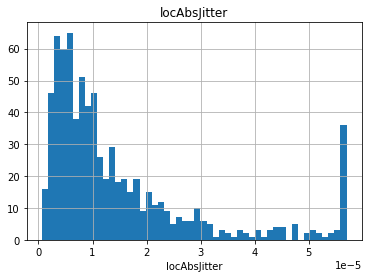

In [105]:
figure = df.locAbsJitter.hist(bins=50)
figure.set_title('locAbsJitter')
figure.set_xlabel('locAbsJitter')

<AxesSubplot:>

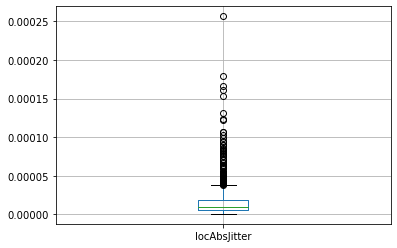

In [106]:
extracted_df.boxplot(column='locAbsJitter')

<AxesSubplot:>

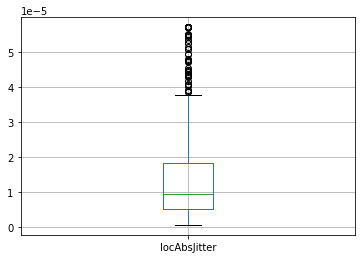

In [107]:
df.boxplot(column='locAbsJitter')